In [1]:
# Packages
import scanpy as sc
import scvi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# R interface
from rpy2.robjects import pandas2ri
from rpy2.robjects import r
import rpy2.rinterface_lib.callbacks
import anndata2ri

pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/tmp/ipykernel_1552294/1336322638.py:16: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [2]:
anndata2ri.__version__

'1.3.1'

In [3]:
sc.settings.figdir = '/project/data/gew123/Spatial/CatsCradle/Converted_adata'

In [2]:
%%R
library("Seurat")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Loading required package: SeuratObject
Loading required package: sp

Attaching package: ‘SeuratObject’

The following objects are masked from ‘package:base’:

    intersect, t



In [4]:
# Load
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


/tmp/ipykernel_1488128/521044821.py:3: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Reading in spatial object

In [2]:
# Read in spatial object
adata = sc.read_h5ad('/project/data/gew123/Spatial/Annotated_objects/spatial_annotated_final.h5ad')

In [52]:
adata

AnnData object with n_obs × n_vars = 182735 × 1000
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'tissue', 'section', 'subtype', 'stage', 'cell_ID', 'fine_annotations', 'broad_annotations', 'cat_annotations', 'leiden_0.3', 'manual_labels'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'c2l_predicted_colors', 'dea_leiden_0.3', 'fine_annotations_colors', 'grouped_annotations_colors', 'leiden', 'leiden_30_0.7_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts', 'log_counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [3]:
# Delete all spatial neighborhood data
del adata.obsp['connectivities']
del adata.obsp['distances']
del adata.obsp['spatial_connectivities']
del adata.obsp['spatial_distances']

del adata.uns['spatial_neighbors']

## Method 1: Conversion using anndata2ri

Checking matrix dtype

In [4]:
adata.layers['counts']

<182735x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 18399145 stored elements in Compressed Sparse Row format>

In [5]:
adata.layers['log_counts']

<182735x1000 sparse matrix of type '<class 'numpy.float32'>'
	with 18399145 stored elements in Compressed Sparse Row format>

In [6]:
adata.X

<182735x1000 sparse matrix of type '<class 'numpy.float32'>'
	with 18399145 stored elements in Compressed Sparse Row format>

Convert all matrices to dense

In [7]:
# Converting counts layer to float dtype
adata.layers['counts'] = adata.layers['counts'].astype(np.float32)
adata.layers['counts']

<182735x1000 sparse matrix of type '<class 'numpy.float32'>'
	with 18399145 stored elements in Compressed Sparse Row format>

In [8]:
# Removing nhood enrichment from adata.uns
del adata.uns['broad_annotations_nhood_enrichment']

Now convert object

In [9]:
# Load
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


/tmp/ipykernel_1451654/521044821.py:3: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [10]:
import scanpy as sc
adata_paul = sc.datasets.paul15()

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/datasets/_datasets.py:200: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['iroot'] = 840


#### Convert to SCE

In [12]:
%%R -i adata
print(adata)

class: SingleCellExperiment 
dim: 1000 182735 
metadata(12): c2l_predicted_colors dea_leiden_0.3 ... tissue_colors
  umap
assays(3): X counts log_counts
rownames(1000): AATK ABL1 ... ZBTB16 ZFP36
rowData names(7): NegPrb n_cells_by_counts ... total_counts
  log1p_total_counts
colnames(182735): 3_1 5_1 ... 475_202 476_202
colData names(25): fov Area ... leiden_0.3 manual_labels
reducedDimNames(3): PCA UMAP spatial
mainExpName: NULL
altExpNames(0):


Saving

In [20]:
# Make directory for saving .rds file
import os
os.makedirs('/project/data/gew123/Spatial/CatsCradle/Converted_adata')

In [21]:
%%R
saveRDS(adata, "/project/data/gew123/Spatial/CatsCradle/Converted_adata/spatial_annotated_sce.rds")

#### Convert to Seurat object

In [24]:
%%R
library("Seurat")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Loading required package: SeuratObject
Loading required package: sp

Attaching package: ‘sp’

The following object is masked from ‘package:IRanges’:

    %over%


Attaching package: ‘SeuratObject’

The following object is masked from ‘package:SummarizedExperiment’:

    Assays

The following object is masked from ‘package:GenomicRanges’:

    intersect

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following object is masked from ‘package:IRanges’:

    intersect

The following object is masked from ‘package:S4Vectors’:

    intersect

The following object is masked from ‘package:BiocGenerics’:

    intersect

The following objects are masked from ‘package:base’:

    intersect, t


Attaching package: ‘Seurat’

The following object is masked from ‘package:SummarizedExperiment’:

    Assays



In [26]:
%%R
adata_seurat <- Seurat::as.Seurat(adata, counts = "counts", data = "log_counts")

In [27]:
%%R
adata_seurat

An object of class Seurat 
1000 features across 182735 samples within 1 assay 
Active assay: originalexp (1000 features, 0 variable features)
 2 layers present: counts, data
 3 dimensional reductions calculated: PCA, UMAP, spatial


Save

In [29]:
%%R
saveRDS(adata_seurat, "/project/data/gew123/Spatial/CatsCradle/Converted_adata/spatial_annotated_seurat_real.rds")

## Convert atlas to seurat object

In [4]:
%%R
library('Seurat')


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Loading required package: SeuratObject
Loading required package: sp

Attaching package: ‘SeuratObject’

The following objects are masked from ‘package:base’:

    intersect, t



In [3]:
# Read in atlas
atlas = sc.read_h5ad('/project/data/gew123/Cell_Annotation/FINAL_ATLAS_OBJECTS/final_atlas_annotated.h5ad')
atlas

AnnData object with n_obs × n_vars = 179633 × 64612
    obs: 'Source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'leiden_res0.9', 'annotations_final'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Source_colors', '_scvi_manager_uuid', '_scvi_uuid', 'annotations_colors', 'annotations_final_colors', 'blue_umap_colors', 'dea_leiden_0.9', 'dendrogram_leiden_res0.9', 'hvg', 'leiden', 'leiden_res0.9_colors', 'manual_labels_final2_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI',

In [36]:
atlas

AnnData object with n_obs × n_vars = 179633 × 64612
    obs: 'Source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'leiden_res0.9', 'annotations_final'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Source_colors', '_scvi_manager_uuid', '_scvi_uuid', 'annotations_colors', 'annotations_final_colors', 'blue_umap_colors', 'dea_leiden_0.9', 'dendrogram_leiden_res0.9', 'hvg', 'leiden', 'leiden_res0.9_colors', 'manual_labels_final2_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI',

In [41]:
atlas.var_names

Index(['5S-rRNA', '5S-rRNA-1', '7SK', '7SK-1', '7SK.2', '7SK.3', 'A1BG',
       'A1BG-AS1', 'A1CF', 'A2M',
       ...
       'snoZ196', 'snoZ6', 'snosnR66', 'uc-338', 'uc-338-1', 'uc-338-2',
       'uc-338-3', 'uc-338-4', 'uc-338-5', 'yR211F11.2'],
      dtype='object', length=64612)

In [50]:
# Remove underscores
atlas.var_names = atlas.var_names.str.replace('_', '-', regex=False)

# Make var names unique
atlas.var_names_make_unique()

# Remove underscores again
atlas.var_names = atlas.var_names.str.replace('_', '-', regex=False)

# Check for remaining duplicates
duplicate_var_names = list(atlas.var_names[atlas.var_names.duplicated()])
if not duplicate_var_names:
    print('No duplicates in dataset.')

No duplicates in dataset.


In [51]:
%%R -i atlas
print(atlas)

class: SingleCellExperiment 
dim: 64612 179633 
metadata(15): Source_colors _scvi_manager_uuid ... pca umap
assays(3): X log_counts raw_counts
rownames(64612): 5S-rRNA 5S-rRNA-1 ... uc-338-5 yR211F11.2
rowData names(15): mt ribo ... highly_variable_nbatches
  highly_variable_intersection
colnames(179633): AAACCTGAGCAATATG_1 AAACCTGAGCGCTTAT_1 ... O14-39
  P17-39
colData names(18): Source n_genes_by_counts ... leiden_res0.9
  annotations_final
reducedDimNames(3): PCA X_scVI UMAP
mainExpName: NULL
altExpNames(0):


In [52]:
%%R
adata_seurat <- Seurat::as.Seurat(atlas, counts = "raw_counts", data = "log_counts")

In addition: Warning message:
Keys should be one or more alphanumeric characters followed by an underscore, setting key from X_scVI_ to XscVI_ 


In [53]:
%%R
adata_seurat

An object of class Seurat 
64612 features across 179633 samples within 1 assay 
Active assay: originalexp (64612 features, 0 variable features)
 2 layers present: counts, data
 3 dimensional reductions calculated: PCA, X_scVI, UMAP


In [54]:
%%R
saveRDS(adata_seurat, "/project/data/gew123/Spatial/Annotated_objects/atlas_annotated_seurat.rds")

## Converting old adata objects for plotting

In [2]:
adata = sc.read_h5ad('/project/data/gew123/Integration/Scvi_Clustered_Object_Final.h5ad')

In [6]:
%%R -i adata
print(adata)

class: SingleCellExperiment 
dim: 4000 183210 
metadata(10): Source_colors _scvi_manager_uuid ... pca umap
assays(5): X log1p log_counts norm_counts raw_counts
rownames(4000): A1CF A2M ... ZSCAN5C ZSWIM4
rowData names(15): mt ribo ... highly_variable_nbatches
  highly_variable_intersection
colnames(183210): AAACCTGAGCAATATG_1 AAACCTGAGCGCTTAT_1 ... O14-39
  P17-39
colData names(20): Source n_genes_by_counts ... leiden_res0.7
  leiden_res0.9
reducedDimNames(3): PCA X_scVI UMAP
mainExpName: NULL
altExpNames(0):


In [8]:
%%R
adata_seurat <- Seurat::as.Seurat(adata, counts = "raw_counts", data = "log_counts")

In addition: Warning message:
Keys should be one or more alphanumeric characters followed by an underscore, setting key from X_scVI_ to XscVI_ 


In [11]:
%%R
saveRDS(adata_seurat, "/project/data/gew123/Converted_Objects/atlas_clustered_unlabelled.rds")

In [ ]:
%%R -i adata
print(adata)

adata_seurat <- Seurat::as.Seurat(adata, counts = "counts", data = "log_counts")

saveRDS(adata, "/project/data/gew123/Spatial/Annotated_objects/atlas_annotated_seurat.rds")

In [23]:
adata = sc.read_h5ad('/project/data/gew123/Integration/Scvi_Clustered_Object_Final.h5ad')

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


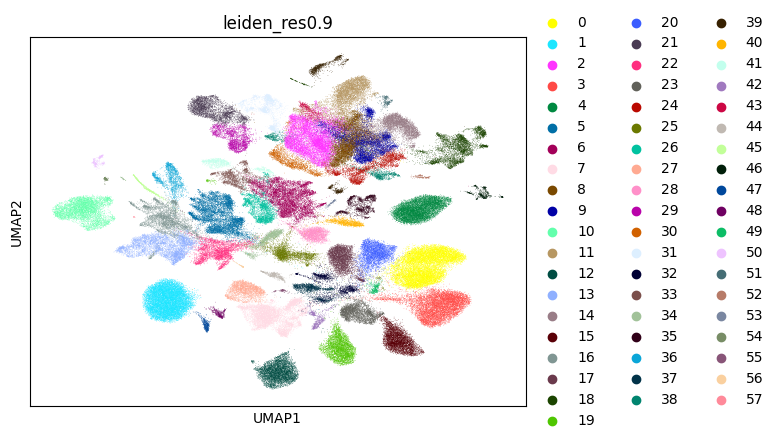

In [25]:
sc.pl.umap(adata, color='leiden_res0.9')

In [27]:
adata.uns['leiden_res0.9_colors']

array(['#ffff00', '#1ce6ff', '#ff34ff', '#ff4a46', '#008941', '#006fa6',
       '#a30059', '#ffdbe5', '#7a4900', '#0000a6', '#63ffac', '#b79762',
       '#004d43', '#8fb0ff', '#997d87', '#5a0007', '#809693', '#6a3a4c',
       '#1b4400', '#4fc601', '#3b5dff', '#4a3b53', '#ff2f80', '#61615a',
       '#ba0900', '#6b7900', '#00c2a0', '#ffaa92', '#ff90c9', '#b903aa',
       '#d16100', '#ddefff', '#000035', '#7b4f4b', '#a1c299', '#300018',
       '#0aa6d8', '#013349', '#00846f', '#372101', '#ffb500', '#c2ffed',
       '#a079bf', '#cc0744', '#c0b9b2', '#c2ff99', '#001e09', '#00489c',
       '#6f0062', '#0cbd66', '#eec3ff', '#456d75', '#b77b68', '#7a87a1',
       '#788d66', '#885578', '#fad09f', '#ff8a9a'], dtype=object)